In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

##### ### Key Name	Description
1. 
Loan_ID	Unique Lo
a    n ID2. 
Gender	Male/ F    
    emal3. e
Married	Applicant married    
     (Y/4. N)
Dependents	Number of dep    
    ende5. nts
Education	Applicant Education (Graduate/ Under G    
    radu6. ate)
Self_Employed	Self-emplo    
    yed 7. (Y/N)
ApplicantIncome	Applic    
    ant 8. income
CoapplicantIncome	Coappli    
    cant9.  income
LoanAmount	Loan amount     
    in t10. housands
Loan_Amount_Term	Term of a l    
    oan 11. in months
Credit_History	credit history me    
    ets 12. guidelines
Property_Area	Urban/ Se    
    mi-U13. rban/ Rural
Loan_Status	Loan approved (Y/N)


In [14]:
df = pd.read_csv('lt1.csv')
df.head()

,Loan_ID,Education,ApplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
0,LP001003,Graduate,4583,128,0,Rural,N
1,LP001005,Graduate,3000,66,1,Urban,Y
2,LP001006,Not Graduate,2583,120,0,Urban,N
3,LP001008,Graduate,6000,141,1,Urban,Y
4,LP001011,Graduate,5417,267,1,Urban,Y


Remove loan id column (irrelevant)

In [15]:
df.drop(["Loan_ID"], axis="columns", inplace=True)
df.dropna(inplace=True)

In [16]:
df

,Education,ApplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
0,Graduate,4583,128,0,Rural,N
1,Graduate,3000,66,1,Urban,Y
2,Not Graduate,2583,120,0,Urban,N
3,Graduate,6000,141,1,Urban,Y
4,Graduate,5417,267,1,Urban,Y
...,...,...,...,...,...,...
245,Graduate,3481,155,0,Semiurban,N
246,Graduate,7200,120,1,Rural,Y
247,Graduate,5166,128,1,Semiurban,Y
248,Graduate,4095,151,1,Rural,Y


edit and convert number on string data to numeric

convert y/n and male/female data to 1/0

In [18]:
#df['Self_Employed'] = df['Self_Employed'].replace({'Yes': 1, 'No': 0})
df['Property_Area'] = pd.factorize(df['Property_Area'])[0] + 1
df['Loan_Status'] = df['Loan_Status'].replace({'Y': 1, 'N': 0})
df['Education'] = df['Education'].replace({'Graduate': 1, "Not Graduate": 0})
df["Credit_History"] = pd.to_numeric(df['Credit_History'], errors='coerce').astype(int)
df["LoanAmount"] = pd.to_numeric(df['LoanAmount'], errors='coerce').astype(int)

base on dataset source, loan amount are written in thousands so we will use the real number

In [19]:
df["LoanAmount"] = df.LoanAmount*1000

look at features correlation and remove unperformed features

In [21]:
df

,Education,ApplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
0,1,4583,128000,0,1,0
1,1,3000,66000,1,2,1
2,0,2583,120000,0,2,0
3,1,6000,141000,1,2,1
4,1,5417,267000,1,2,1
...,...,...,...,...,...,...
245,1,3481,155000,0,3,0
246,1,7200,120000,1,1,1
247,1,5166,128000,1,3,1
248,1,4095,151000,1,1,1


In [22]:
scaler = StandardScaler()
df[["ApplicantIncome", "LoanAmount"]] = scaler.fit_transform(df[["ApplicantIncome", "LoanAmount"]])

each column impact on loan status visualization

<Axes: xlabel='Property_Area'>

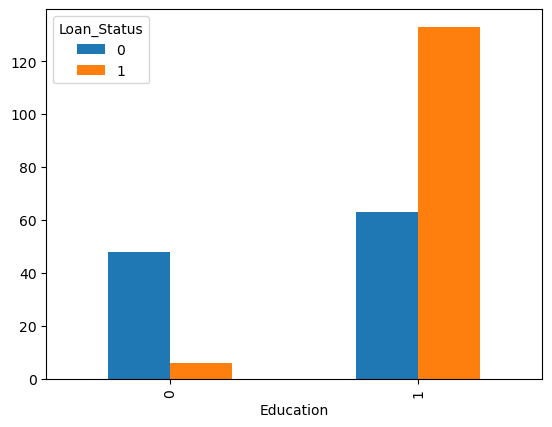

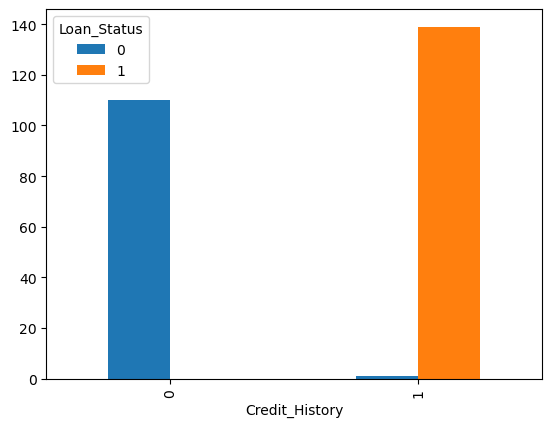

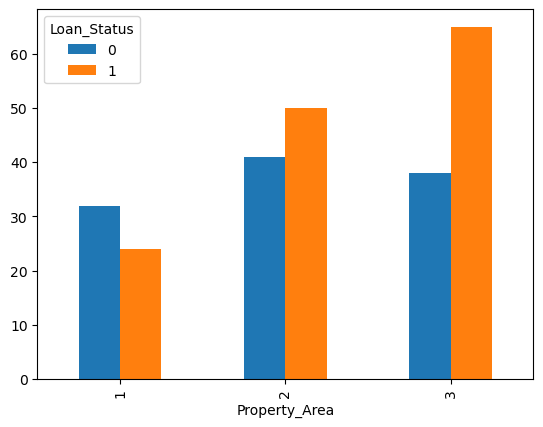

In [24]:
#pd.crosstab(df['Dependents'], df.Loan_Status).plot(kind="bar")
pd.crosstab(df['Education'], df.Loan_Status).plot(kind="bar")
pd.crosstab(df['Credit_History'], df.Loan_Status).plot(kind="bar")
pd.crosstab(df['Property_Area'], df.Loan_Status).plot(kind="bar")

In [25]:
df[df.Loan_Status == 1].shape

(139, 6)

In [26]:
df[df.Loan_Status == 0].shape

(111, 6)

<b> 4. Data Preparation

In [27]:
#Extracting Independent and dependent Variable  
X = df.drop(["Loan_Status"], axis=1)
y = df['Loan_Status']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=64)

<b> 5. Create LOGISTIC Regression model

In [29]:
#Fitting Logistic Regression to the training set  
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression(random_state=0)  
classifier.fit(X_train, y_train)  


LogisticRegression(random_state=0)

In [30]:
regression = LogisticRegression(C=1, penalty='l1', solver='liblinear')
regression.fit(X_train, y_train)
regression.score(X_test, y_test)

1.0

In [31]:
#Predicting the test set result  
y_pred= classifier.predict(X_test)  

In [32]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

In [33]:
cm

array([[33,  0],
       [ 0, 42]], dtype=int64)

<Axes: xlabel='ApplicantIncome', ylabel='LoanAmount'>

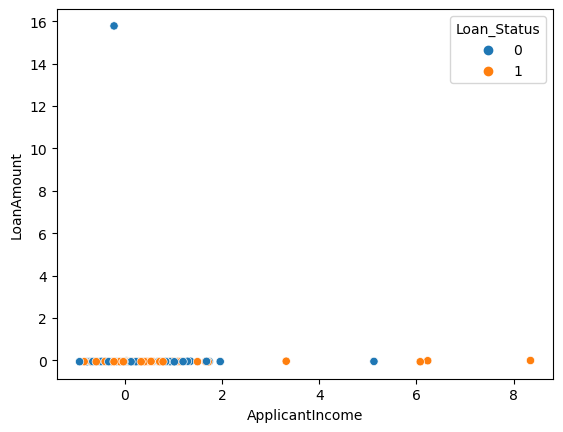

In [34]:
import seaborn as sns
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', hue='Loan_Status',data=df)

In [36]:
pickle.dump(regression, open('logisticloan.pkl','wb'))


In [37]:
pickled_model = pickle.load(open('logisticloan.pkl', 'rb'))
pickled_model.predict(X_test)


array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1], dtype=int64)